# Example

The example uses the dataset from here:
    
    https://archive.ics.uci.edu/ml/datasets/synthetic+control+chart+time+series

However, it is conveniently placed in this repository for reproducability purposes.

In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt
from clustering import DTWClustering

%matplotlib inline

## Load Data

In [2]:
data = np.loadtxt('/home/tyler/data/synthetic-control-clustering-time-series/synthetic_control.data')

Labels

* 1-100 Normal
* 101-200 Cyclic
* 201-300 Increasing trend
* 301-400 Decreasing trend
* 401-500 Upward shift
* 501-600 Downward shift

In [3]:
labels = []
base_labels = (
    'Normal',
    'Cyclic',
    'Increasing trend',
    'Decreasing trend',
    'Upward shift',
    'Downward shift'
)

for label in base_labels:
    if labels:
        labels.extend([label] * 100)
    else:
        labels = [label] * 100

## Create Model with Defaults

In [4]:
model = DTWClustering(data, 6)

In [5]:
model.train()

0.0009077170398086309 queue placement complete
5.3279358060099185 computations complete
5.328796220012009 iteration complete
0.0009703729301691055 queue placement complete
8.229892909061164 computations complete
8.230524240992963 iteration complete
0.0009860440623015165 queue placement complete
8.31547766411677 computations complete
8.317329309182242 iteration complete
0.0027228170074522495 queue placement complete
4.946478131227195 computations complete
4.94715844001621 iteration complete
0.0011939548421651125 queue placement complete
8.059087323024869 computations complete
8.059723700862378 iteration complete
0.0009393729269504547 queue placement complete
4.702699644025415 computations complete
4.703351608011872 iteration complete
0.0010388658847659826 queue placement complete
5.2531436460558325 computations complete
5.253768526017666 iteration complete
0.0009712721221148968 queue placement complete
6.928620724007487 computations complete
6.929349286016077 iteration complete
0.001170

## Visualize Centroids

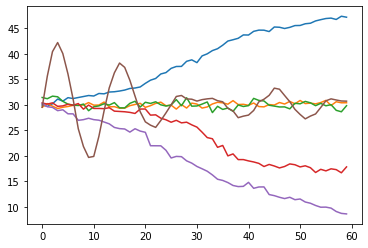

In [6]:
for centroid in model.centroids:
    plt.plot(np.arange(len(centroid)), centroid)

## Visualize Clusters

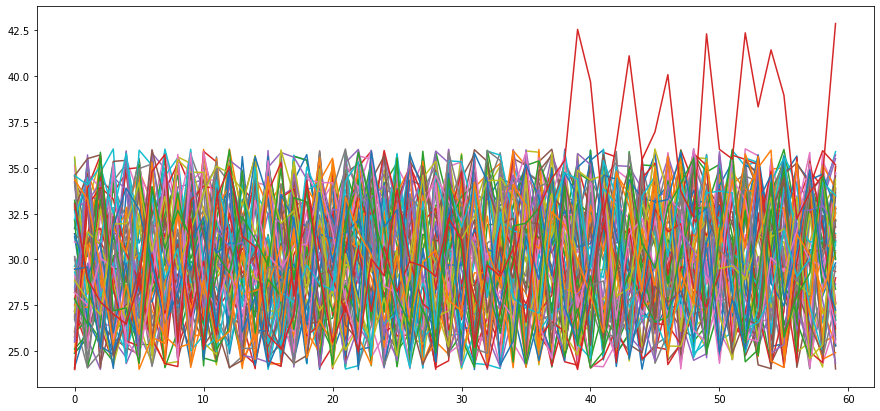

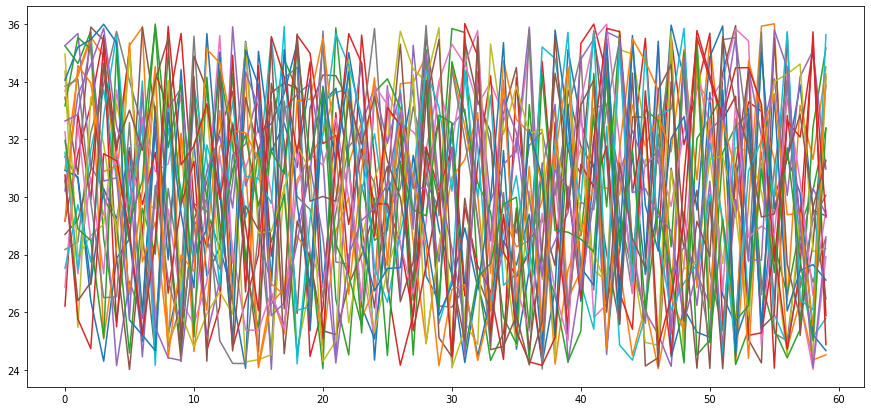

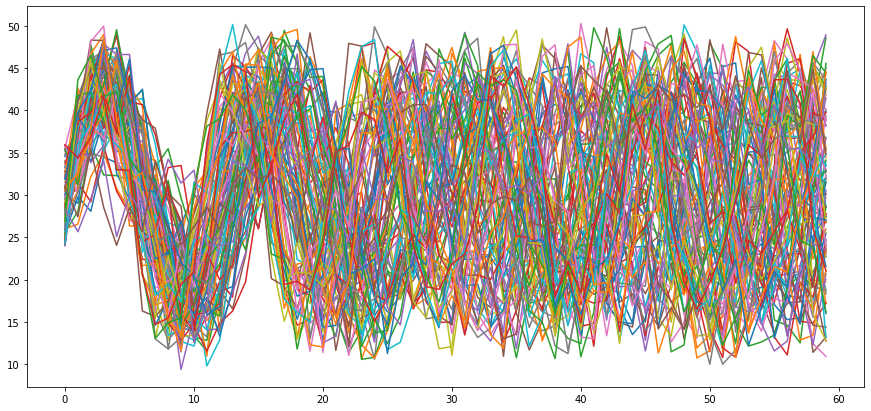

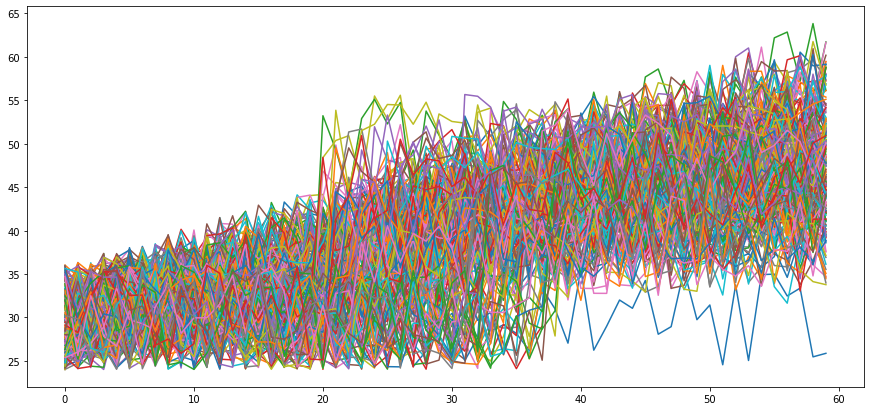

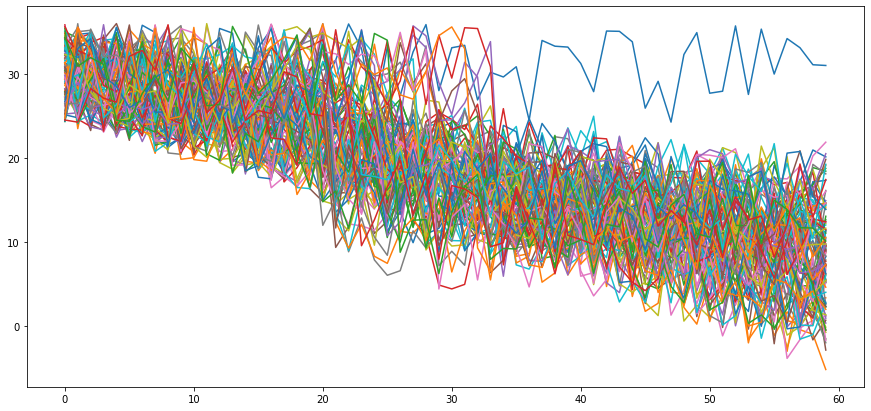

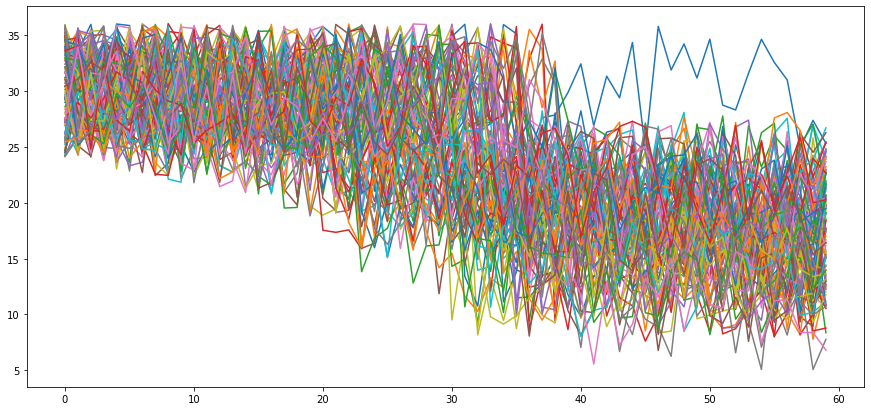

In [7]:
for centroid_key in model.clusters:
    plt.figure(figsize=(15,7))
    centroid = data[centroid_key]
    plt.plot(np.arange(len(centroid)), centroid)
    for series_index in model.clusters[centroid_key]:
        series = data[series_index]
        plt.plot(np.arange(len(series)), series)
    
    plt.show()

## Predict

In [8]:
model.predict(data[0])

(25.028947617629633, 5)